In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [ ]:

from google.colab import files
import zipfile, os, glob
uploaded = files.upload()
for fn in uploaded.keys():
    print("Uploaded:", fn)
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(fn, 'r') as zf:
            zf.extractall('dataset')
        print("Extracted to folder 'dataset'.")
csv_files = glob.glob('dataset/**/*.csv', recursive=True) + glob.glob('*.csv')
print("CSV files found:", csv_files)
data_path = csv_files[0]
print("Using dataset:", data_path)


Saving archive (9).zip to archive (9).zip
Uploaded: archive (9).zip
Extracted to folder 'dataset'.
CSV files found: ['dataset/Housing.csv']
Using dataset: dataset/Housing.csv


In [ ]:

df = pd.read_csv(data_path)
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape: (545, 13)

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:

print("\n--- Info ---")
print(df.info())
print("\n--- Describe numeric ---")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

--- Describe numeric ---
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  5

In [ ]:

TARGET = 'price'
X = df.drop(columns=[TARGET])
y = df[TARGET]
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (436, 12)
Test shape: (109, 12)


In [ ]:

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

print("✅ Preprocessing pipelines ready.")


✅ Preprocessing pipelines ready.


In [ ]:

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
print("✅ Model trained successfully.")


✅ Model trained successfully.


In [ ]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)


MSE : 1754318687330.6682
RMSE: 1324506.9600914402
MAE : 970043.4039201644
R²  : 0.6529242642153175


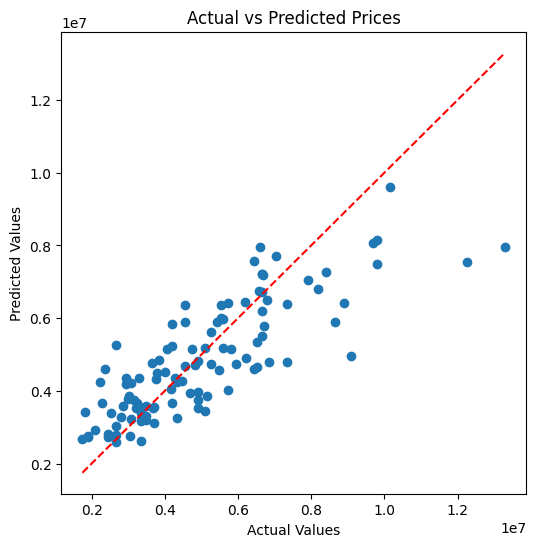

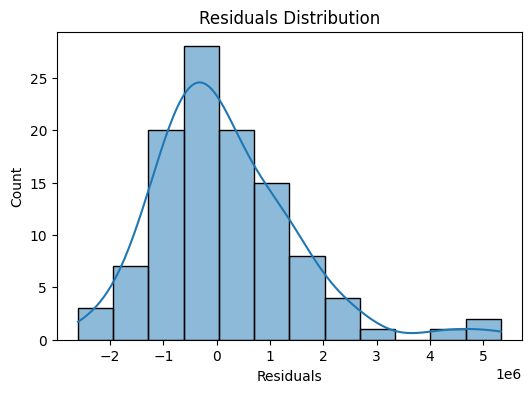

In [ ]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(y_test - y_pred, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


In [ ]:

joblib.dump(model, 'linear_regression_model.joblib')
print("✅ Model saved as 'linear_regression_model.joblib'")
from google.colab import files
files.download('linear_regression_model.joblib')


✅ Model saved as 'linear_regression_model.joblib'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

loaded_model = joblib.load('linear_regression_model.joblib')
sample = X_test.iloc[:1]
pred = loaded_model.predict(sample)
print("Predicted price for sample:", pred[0])


Predicted price for sample: 5164653.900339669


Top 15 Important Features:


,Feature,Coefficient
2,bathrooms,521879.027748
0,area,519552.416340
14,airconditioning_yes,395713.367922
3,stories,349251.438906
12,hotwaterheating_yes,342324.942669
16,prefarea_yes,314945.282657
10,basement_yes,195125.588091
4,parking,192005.953667
6,mainroad_yes,183959.973840
17,furnishingstatus_furnished,180175.626604


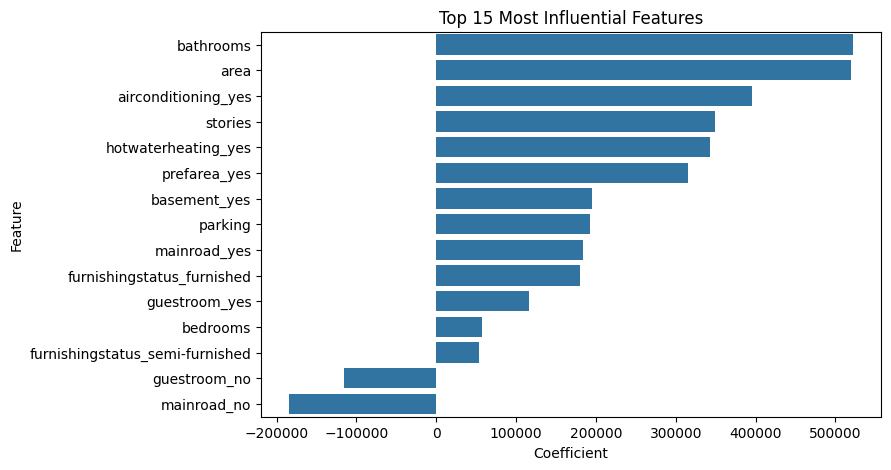

In [ ]:

import numpy as np
preprocessor = model.named_steps['preprocessor']
numeric_names = numeric_features
categorical_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_names, categorical_names])
coefficients = model.named_steps['regressor'].coef_
importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print("Top 15 Important Features:")
display(importance.head(15))
plt.figure(figsize=(8,5))
sns.barplot(data=importance.head(15), x='Coefficient', y='Feature')
plt.title("Top 15 Most Influential Features")
plt.show()


In [ ]:

from sklearn.linear_model import Ridge, Lasso
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.001))
])
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} →  RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.3f}")

print("\n--- Model Comparison ---")
evaluate("Linear Regression", y_test, y_pred)
evaluate("Ridge Regression", y_test, ridge_pred)
evaluate("Lasso Regression", y_test, lasso_pred)



--- Model Comparison ---
Linear Regression →  RMSE: 1324506.96 | MAE: 970043.40 | R²: 0.653
Ridge Regression →  RMSE: 1325417.46 | MAE: 970724.38 | R²: 0.652
Lasso Regression →  RMSE: 1324506.96 | MAE: 970043.41 | R²: 0.653


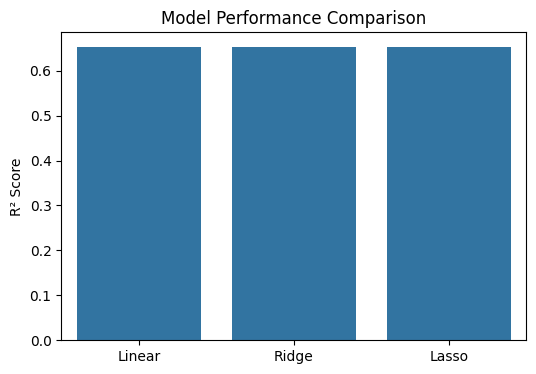

In [ ]:

models = ['Linear', 'Ridge', 'Lasso']
r2_scores = [
    r2_score(y_test, y_pred),
    r2_score(y_test, ridge_pred),
    r2_score(y_test, lasso_pred)
]
plt.figure(figsize=(6,4))
sns.barplot(x=models, y=r2_scores)
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.show()
